In [1]:
import nilmtk
from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore
from nilmtk.legacy.disaggregate import CombinatorialOptimisation
from nilmtk.utils import print_dict
from nilmtk.metrics import f1_score

In [2]:
data = DataSet('SmartMe.h5')

/Users/ken/opt/anaconda3/envs/nilmtk-env/lib/python3.8/site-packages/nilmtk/metergroup.py:85: RuntimeWarning: Building 1 has an empty 'appliances' list.
  warnings.warn("Building {} has an empty 'appliances' list."
/Users/ken/opt/anaconda3/envs/nilmtk-env/lib/python3.8/site-packages/nilmtk/metergroup.py:85: RuntimeWarning: Building 2 has an empty 'appliances' list.
  warnings.warn("Building {} has an empty 'appliances' list."
/Users/ken/opt/anaconda3/envs/nilmtk-env/lib/python3.8/site-packages/nilmtk/metergroup.py:85: RuntimeWarning: Building 3 has an empty 'appliances' list.
  warnings.warn("Building {} has an empty 'appliances' list."
/Users/ken/opt/anaconda3/envs/nilmtk-env/lib/python3.8/site-packages/nilmtk/metergroup.py:85: RuntimeWarning: Building 4 has an empty 'appliances' list.
  warnings.warn("Building {} has an empty 'appliances' list."
/Users/ken/opt/anaconda3/envs/nilmtk-env/lib/python3.8/site-packages/nilmtk/metergroup.py:85: RuntimeWarning: Building 5 has an empty 'appli

# Basic Stats

In [3]:
print_dict(data.metadata)

In [4]:
print_dict(data.buildings)

In [5]:
print_dict(data.buildings[1].metadata)

In [6]:
data.buildings[1].elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='SmartMe', site_meter, appliances=[])
)

In [7]:
print('Loaded', len(data.buildings), 'buildings')

Loaded 7 buildings


In [8]:
elec = data.buildings[1].elec

In [9]:
elec.get_timeframe()

TimeFrame(start='2023-08-01 02:00:03+02:00', end='2023-08-31 12:23:13+02:00', empty=False)

In [10]:
data.set_window(start='2023-08-01', end='2023-08-07')
elec_1 = data.buildings[1].elec

In [11]:
mains=elec_1.mains()
submeters=elec_1.submeters()

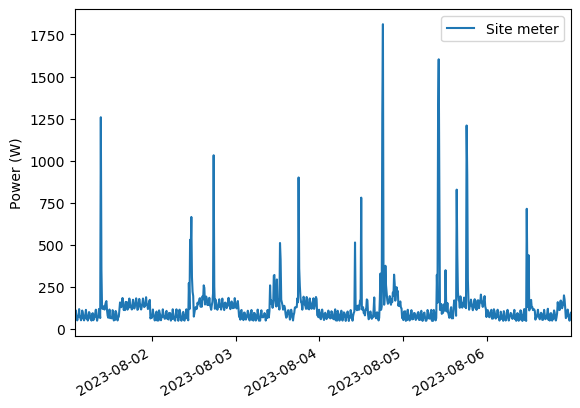

In [12]:
mains.plot()

In [13]:
print(mains)
print(mains.sample_period)
print(mains.total_energy())

ElecMeter(instance=1, building=1, dataset='SmartMe', site_meter, appliances=[])
<bound method ElecMeter.sample_period of ElecMeter(instance=1, building=1, dataset='SmartMe', site_meter, appliances=[])>
active    19.058496
dtype: float64


In [14]:
mains.available_ac_types('power')

['active']

In [15]:
submeters.available_ac_types('power')

[]

# Disaggregation

In [16]:
from nilmtk.legacy.disaggregate.hart_85 import Hart85
h = Hart85()

In [17]:
h.train(mains, columns=[('power', 'active')], noise_level=40)

Finding Edges, please wait ...


Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.


In [18]:
output = HDFDataStore('output.h5', 'w')
df=h.disaggregate(mains, output)

Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
Next Chunk..
Next Chunk..
Next Chunk..
Next Chunk..
Next Chunk..
Appending mains data to datastore
Done


In [19]:
df

,0,1,2,3,4
2023-08-05 08:14:00+02:00,0,0,0,0,0
2023-08-05 08:15:00+02:00,0,0,0,0,0
2023-08-05 08:16:00+02:00,0,0,0,0,0
2023-08-05 08:17:00+02:00,0,0,0,0,0
2023-08-05 08:18:00+02:00,0,0,0,0,0
...,...,...,...,...,...
2023-08-06 23:55:00+02:00,52,0,1231,0,0
2023-08-06 23:56:00+02:00,52,0,1231,0,0
2023-08-06 23:57:00+02:00,52,0,1231,0,0
2023-08-06 23:58:00+02:00,52,0,1231,0,0
